# Airbnb Dublin Dataset Analysis Project
In this notebook, you will analyze the dataset by cleaning and answering 15 questions.
Please write your code in the provided cells for each question.
use appropriate plots to visualize the data, and explain your findings.

- BONUS - wrap your code with functions when possible and suitable. (only general functions, not specific to a question)

## Importing Libraries 


In [36]:
!python -m pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!python -m pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

## Functions Block (If needed)


In [17]:
# Open the files
df_airlines = pd.read_csv(r"C:\Users\yaelh\OneDrive\Documentos\Data Analyst Course\Python\Final Group Project\airlines_reviews.csv")

In [18]:
print(df_airlines.head())

                                  Title              Name Review Date  \
0                    Flight was amazing  Alison Soetantyo  2024-03-01   
1  seats on this aircraft are dreadful      Robert Watson  2024-02-21   
2          Food was plentiful and tasty             S Han  2024-02-20   
3          “how much food was available          D Laynes  2024-02-19   
4       “service was consistently good”         A Othman   2024-02-19   

              Airline Verified  \
0  Singapore Airlines     True   
1  Singapore Airlines     True   
2  Singapore Airlines     True   
3  Singapore Airlines     True   
4  Singapore Airlines     True   

                                             Reviews Type of Traveller  \
0    Flight was amazing. The crew onboard this fl...      Solo Leisure   
1    Booking an emergency exit seat still meant h...      Solo Leisure   
2    Excellent performance on all fronts. I would...    Family Leisure   
3   Pretty comfortable flight considering I was f...      So

In [8]:
print(df_searches.head())

          ds                               id_user  ds_checkin ds_checkout  \
0 2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-12   
1 2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-19   
2 2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5         NaN         NaN   
3 2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5  2014-11-08  2014-11-10   
4 2014-10-01  001c04f0-5a94-4ee0-bf5d-3591265256de         NaN         NaN   

   n_searches  n_nights  n_guests_min  n_guests_max origin_country  \
0          16       3.0             2             2             IE   
1           3      10.0             1             2             IE   
2           1       NaN             1             1             GB   
3          11       2.0             1             2             GB   
4           1       NaN             1             1             IE   

   filter_price_min  filter_price_max                    filter_room_types  \
0               0.0             

In [9]:
print(df_countries.head())

             Name Code
0     Afghanistan   AF
1   Åland Islands   AX
2         Albania   AL
3         Algeria   DZ
4  American Samoa   AS


## Data Preprocessing and Cleaning Block



In [10]:
#cleaning contacts DF

In [19]:
df_airlines.columns

Index(['Title', 'Name', 'Review Date', 'Airline', 'Verified', 'Reviews',
       'Type of Traveller', 'Month Flown', 'Route', 'Class', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended'],
      dtype='object')

In [20]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [35]:
valid_routes.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
origin                    0
destination               0
Origin                    0
Destination               0
dtype: int64

In [ ]:
# We want to clean the Route column
valid_routes = df_airlines[df_airlines['Route'].str.count(" to ") == 1].copy()

<class 'pandas.core.frame.DataFrame'>
Index: 8088 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8088 non-null   object
 1   Name                    8088 non-null   object
 2   Review Date             8088 non-null   object
 3   Airline                 8088 non-null   object
 4   Verified                8088 non-null   object
 5   Reviews                 8088 non-null   object
 6   Type of Traveller       8088 non-null   object
 7   Month Flown             8088 non-null   object
 8   Route                   8088 non-null   object
 9   Class                   8088 non-null   object
 10  Seat Comfort            8088 non-null   int64 
 11  Staff Service           8088 non-null   int64 
 12  Food & Beverages        8088 non-null   int64 
 13  Inflight Entertainment  8088 non-null   int64 
 14  Value For Money         8088 non-null   int64 
 15  Overall R

In [28]:
valid_routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8088 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8088 non-null   object
 1   Name                    8088 non-null   object
 2   Review Date             8088 non-null   object
 3   Airline                 8088 non-null   object
 4   Verified                8088 non-null   object
 5   Reviews                 8088 non-null   object
 6   Type of Traveller       8088 non-null   object
 7   Month Flown             8088 non-null   object
 8   Route                   8088 non-null   object
 9   Class                   8088 non-null   object
 10  Seat Comfort            8088 non-null   int64 
 11  Staff Service           8088 non-null   int64 
 12  Food & Beverages        8088 non-null   int64 
 13  Inflight Entertainment  8088 non-null   int64 
 14  Value For Money         8088 non-null   int64 
 15  Overall R

In [31]:
valid_routes[['Origin', 'Destination']] = valid_routes['Route'].str.split(" to ", expand=True)


In [32]:
valid_routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8088 entries, 0 to 8099
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8088 non-null   object
 1   Name                    8088 non-null   object
 2   Review Date             8088 non-null   object
 3   Airline                 8088 non-null   object
 4   Verified                8088 non-null   object
 5   Reviews                 8088 non-null   object
 6   Type of Traveller       8088 non-null   object
 7   Month Flown             8088 non-null   object
 8   Route                   8088 non-null   object
 9   Class                   8088 non-null   object
 10  Seat Comfort            8088 non-null   int64 
 11  Staff Service           8088 non-null   int64 
 12  Food & Beverages        8088 non-null   int64 
 13  Inflight Entertainment  8088 non-null   int64 
 14  Value For Money         8088 non-null   int64 
 15  Overall R

In [33]:
valid_routes.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
origin                    0
destination               0
Origin                    0
Destination               0
dtype: int64

In [16]:
print(df_searches['id_user'].nunique())
print(df_searches['id_user'].head())

18605
0    0000af0a-6f26-4233-9832-27efbfb36148
1    0000af0a-6f26-4233-9832-27efbfb36148
2    000cd9d3-e05b-4016-9e09-34a6f8ba2fc5
3    000cd9d3-e05b-4016-9e09-34a6f8ba2fc5
4    001c04f0-5a94-4ee0-bf5d-3591265256de
Name: id_user, dtype: object


In [17]:
print(df_contacts['id_guest'].nunique())
print(df_contacts['id_guest'].head())

3283
0    000dfad9-459b-4f0b-8310-3d6ab34e4f57
1    00197051-c6cb-4c3a-99e9-86615b819874
2    0027538e-aa9e-4a02-8979-b8397e5d4cba
3    0027538e-aa9e-4a02-8979-b8397e5d4cba
4    0027538e-aa9e-4a02-8979-b8397e5d4cba
Name: id_guest, dtype: object


In [18]:
# I just want to filter the table by those bookings that were confirmed
df_bookings_confirmed = df_contacts[df_contacts['ts_booking_at'].notna()].copy()

# Verificamos las primeras filas para confirmar
print(df_bookings_confirmed.head())

# Opcional: resetear el índice
df_bookings_confirmed.reset_index(drop=True, inplace=True)

                                id_guest  \
0   000dfad9-459b-4f0b-8310-3d6ab34e4f57   
1   00197051-c6cb-4c3a-99e9-86615b819874   
4   0027538e-aa9e-4a02-8979-b8397e5d4cba   
9   007a3626-1c7b-44a9-8407-52c0f3f6cf49   
11  007b4c4e-261d-4db9-b5cc-5a824e9f2abc   

                                 id_host  \
0   13bb24b8-d432-43a2-9755-5ea11b43bb69   
1   46aa3897-9c00-4d76-ac66-a307593d0675   
4   ac162061-55e2-4072-ac91-2e080f9581f2   
9   ed4291f5-78e2-4654-9c76-7fdc36af0469   
11  6fccecd2-5a89-4832-856e-cb45f477f7bd   

                              id_listing       ts_contact_at  \
0   21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370 2014-10-04 16:26:28   
1   fb5ed09a-9848-4f2c-b2ef-34deb62164fb 2014-11-04 09:10:03   
4   ec68e0af-b0f2-42c7-b6f8-d41061c083ff 2014-10-10 15:22:26   
9   30550df2-1a2c-4969-95cc-2e30e4324b20 2014-12-29 18:44:50   
11  2ce4f20d-13b8-4960-b446-72ffc698b65f 2014-10-15 17:43:32   

           ts_reply_at      ts_accepted_at       ts_booking_at ds_checkin  \
0  2014-

In [19]:
df_bookings_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_guest        2174 non-null   object        
 1   id_host         2174 non-null   object        
 2   id_listing      2174 non-null   object        
 3   ts_contact_at   2174 non-null   datetime64[ns]
 4   ts_reply_at     2174 non-null   datetime64[ns]
 5   ts_accepted_at  2174 non-null   datetime64[ns]
 6   ts_booking_at   2174 non-null   datetime64[ns]
 7   ds_checkin      2174 non-null   datetime64[ns]
 8   ds_checkout     2174 non-null   datetime64[ns]
 9   n_guests        2174 non-null   int64         
 10  n_messages      2174 non-null   int64         
dtypes: datetime64[ns](6), int64(2), object(3)
memory usage: 187.0+ KB


In [20]:
#cleaning searches
df_searches.columns

Index(['ds', 'id_user', 'ds_checkin', 'ds_checkout', 'n_searches', 'n_nights',
       'n_guests_min', 'n_guests_max', 'origin_country', 'filter_price_min',
       'filter_price_max', 'filter_room_types', 'filter_neighborhoods'],
      dtype='object')

In [21]:
df_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  datetime64[ns]
 1   id_user               35737 non-null  object        
 2   ds_checkin            23888 non-null  object        
 3   ds_checkout           23888 non-null  object        
 4   n_searches            35737 non-null  int64         
 5   n_nights              23888 non-null  float64       
 6   n_guests_min          35737 non-null  int64         
 7   n_guests_max          35737 non-null  int64         
 8   origin_country        35737 non-null  object        
 9   filter_price_min      13322 non-null  float64       
 10  filter_price_max      13322 non-null  float64       
 11  filter_room_types     16191 non-null  object        
 12  filter_neighborhoods  1346 non-null   object        
dtypes: datetime64[ns

In [22]:
df_searches['ds_checkin'] = pd.to_datetime(df_searches['ds_checkin'], errors='coerce')
df_searches['ds_checkout'] = pd.to_datetime(df_searches['ds_checkout'], errors='coerce')


In [23]:
print(df_searches.isnull().sum())


ds                          0
id_user                     0
ds_checkin              11850
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64


In [24]:
print(df_searches['id_user'].nunique())
print(df_searches['id_user'].head())

18605
0    0000af0a-6f26-4233-9832-27efbfb36148
1    0000af0a-6f26-4233-9832-27efbfb36148
2    000cd9d3-e05b-4016-9e09-34a6f8ba2fc5
3    000cd9d3-e05b-4016-9e09-34a6f8ba2fc5
4    001c04f0-5a94-4ee0-bf5d-3591265256de
Name: id_user, dtype: object


In [ ]:
# value counts
user_counts = df_searches['id_user'].value_counts()

print(user_counts)


id_user
5afc72d5-444b-4ac1-a8d4-333996e8a7c8    81
2faf4b2a-9c7b-4268-af1e-900a7c45aac3    55
04af2893-9c35-4ab3-8501-67cee003e802    35
38f67f18-93fa-42e6-896f-f6c3bf24e3f1    32
02b000a8-4afa-41f2-b811-1da3bb88d841    31
                                        ..
015df21e-0d83-4725-9b6c-ba8167e132f0     1
01d6c840-83b2-4207-99b1-ffa9eecefa0c     1
023c8d5f-1a97-4c11-861d-85e17269ef74     1
fed8775d-fad7-4706-8c0c-a42bf3f735f7     1
ff052b68-d1c2-461d-bfbf-55563208d1f5     1
Name: count, Length: 18605, dtype: int64


## Data Analysis Block


## 1. What is the average length of stay for guests? Analyze how the stay duration (in days) differs across different room types (e.g., private room, shared room, entire home).
Create a plot to visualize the average stay duration for each room type.

In [26]:
df_searches['stay_duration'] = (pd.to_datetime(df_searches['ds_checkout']) - pd.to_datetime(df_searches['ds_checkin'])).dt.days


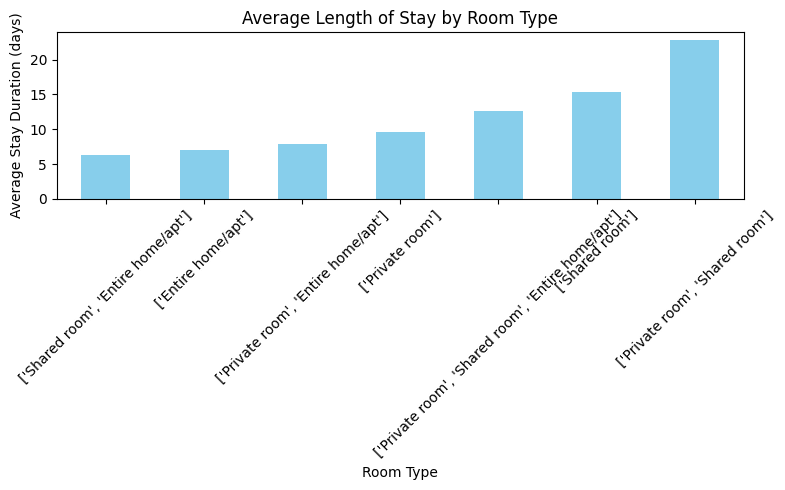

In [27]:
# convert check-in and check-out columns to datetime in case they aren't already
df_searches['ds_checkin'] = pd.to_datetime(df_searches['ds_checkin'], errors='coerce')
df_searches['ds_checkout'] = pd.to_datetime(df_searches['ds_checkout'], errors='coerce')

# calculate the number of nights by subtracting check-in from check-out
df_searches['stay_duration'] = (df_searches['ds_checkout'] - df_searches['ds_checkin']).dt.days

# remove rows where stay duration or room type is missing
df_valid = df_searches.dropna(subset=['stay_duration', 'filter_room_types'])

# calculate average stay duration for each room type
avg_stay_by_room = df_valid.groupby('filter_room_types')['stay_duration'].mean().sort_values()

# plot the results to visualize average stay per room type
avg_stay_by_room.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Average Length of Stay by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Stay Duration (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Analyze the number of contacts made throughout the day. Are there any specific hours during which users are more likely to contact hosts? Create a time-based plot showing contact volume by hour of the day.

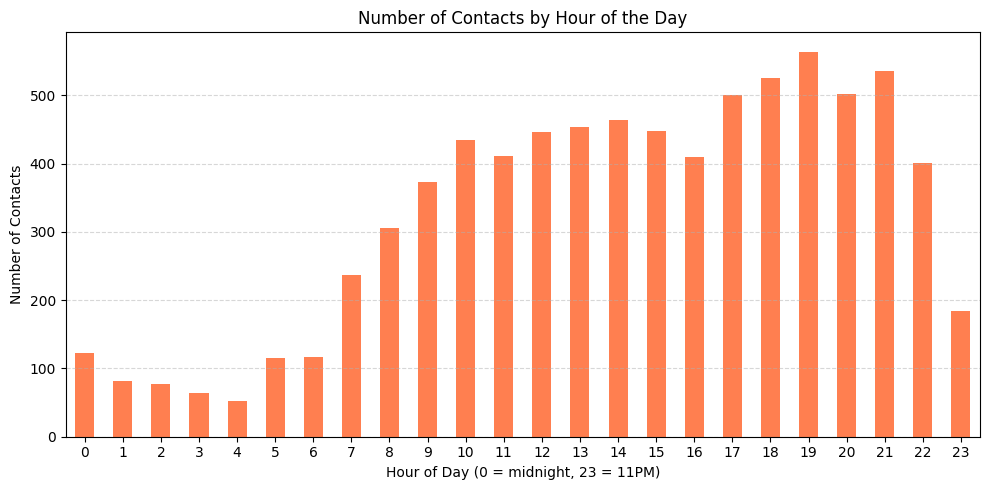

In [28]:
# extract the hour from the contact timestamp (0 to 23)
df_contacts['contact_hour'] = df_contacts['ts_contact_at'].dt.hour

# count how many contacts were made per hour
contacts_by_hour = df_contacts['contact_hour'].value_counts().sort_index()

# plot the distribution of contacts across the 24-hour day
plt.figure(figsize=(10, 5))
contacts_by_hour.plot(kind='bar', color='coral')
plt.title('Number of Contacts by Hour of the Day')
plt.xlabel('Hour of Day (0 = midnight, 23 = 11PM)')
plt.ylabel('Number of Contacts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 3. Investigate the effect of stay duration on the contact-to-search ratio. Group the data by the length of the stay (in days) and calculate the ratio of contacts made to searches performed. Categorize the stay duration for better insights.

C:\Users\yaelh\AppData\Local\Temp\ipykernel_26876\1705123406.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratios = ratio_df.groupby('stay_duration_cat')['contact_to_search_ratio'].mean()


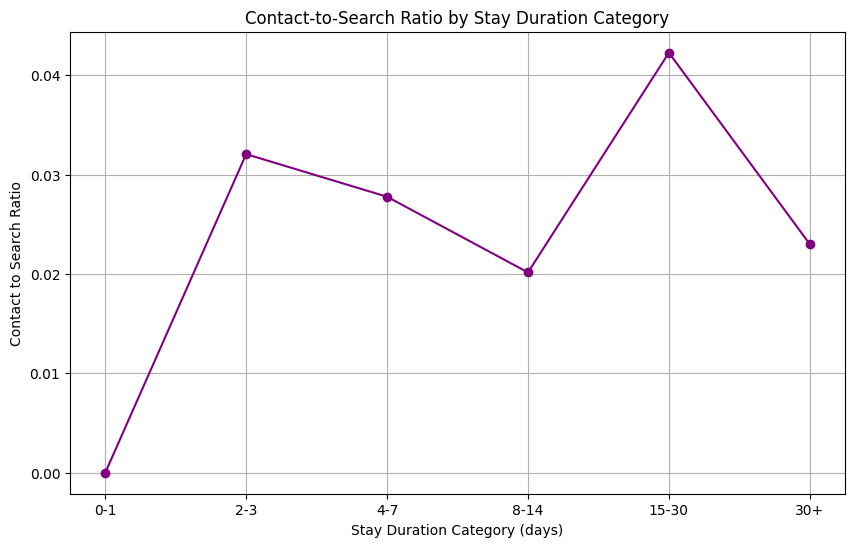

In [ ]:
# Calculate stay_duration in df_contacts (days between checkin and checkout)
df_contacts['ds_checkin'] = pd.to_datetime(df_contacts['ds_checkin'])
df_contacts['ds_checkout'] = pd.to_datetime(df_contacts['ds_checkout'])
df_contacts['stay_duration'] = (df_contacts['ds_checkout'] - df_contacts['ds_checkin']).dt.days

# For df_searches, use n_nights as stay duration (already numeric)
# but if n_nights has missing, fallback to difference of dates
df_searches['ds_checkin'] = pd.to_datetime(df_searches['ds_checkin'], errors='coerce')
df_searches['ds_checkout'] = pd.to_datetime(df_searches['ds_checkout'], errors='coerce')
df_searches['stay_duration'] = df_searches['n_nights']

# Fill missing n_nights by date difference
mask_missing_nights = df_searches['stay_duration'].isna()
df_searches.loc[mask_missing_nights, 'stay_duration'] = (
    (df_searches.loc[mask_missing_nights, 'ds_checkout'] - df_searches.loc[mask_missing_nights, 'ds_checkin']).dt.days
)

# Aggregate number of contacts by stay_duration in df_contacts
contacts_count = df_contacts.groupby('stay_duration').size().rename('contacts')

# Aggregate number of searches by stay_duration in df_searches
searches_count = df_searches.groupby('stay_duration')['n_searches'].sum().rename('searches')

# Merge contacts and searches counts on stay_duration
ratio_df = pd.concat([contacts_count, searches_count], axis=1).fillna(0)

# Calculate ratio of contacts to searches
ratio_df['contact_to_search_ratio'] = ratio_df['contacts'] / ratio_df['searches'].replace(0, pd.NA)

# Categorize stay_duration for better insights
bins = [0, 1, 3, 7, 14, 30, 100]
labels = ['0-1', '2-3', '4-7', '8-14', '15-30', '30+']

ratio_df = ratio_df.reset_index()
ratio_df['stay_duration_cat'] = pd.cut(ratio_df['stay_duration'], bins=bins, labels=labels, right=False)

# Plot contact-to-search ratio by stay_duration category (mean ratio per category)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mean_ratios = ratio_df.groupby('stay_duration_cat')['contact_to_search_ratio'].mean()
mean_ratios.plot(kind='line', marker='o', color='purple')

plt.title('Contact-to-Search Ratio by Stay Duration Category')
plt.xlabel('Stay Duration Category (days)')
plt.ylabel('Contact to Search Ratio')
plt.grid(True)
plt.show()


## 4. Compare the behavior of guests from different countries. Analyze the average number of searches made by guests from each country. Are guests from some countries more likely to perform multiple searches before contacting a host?

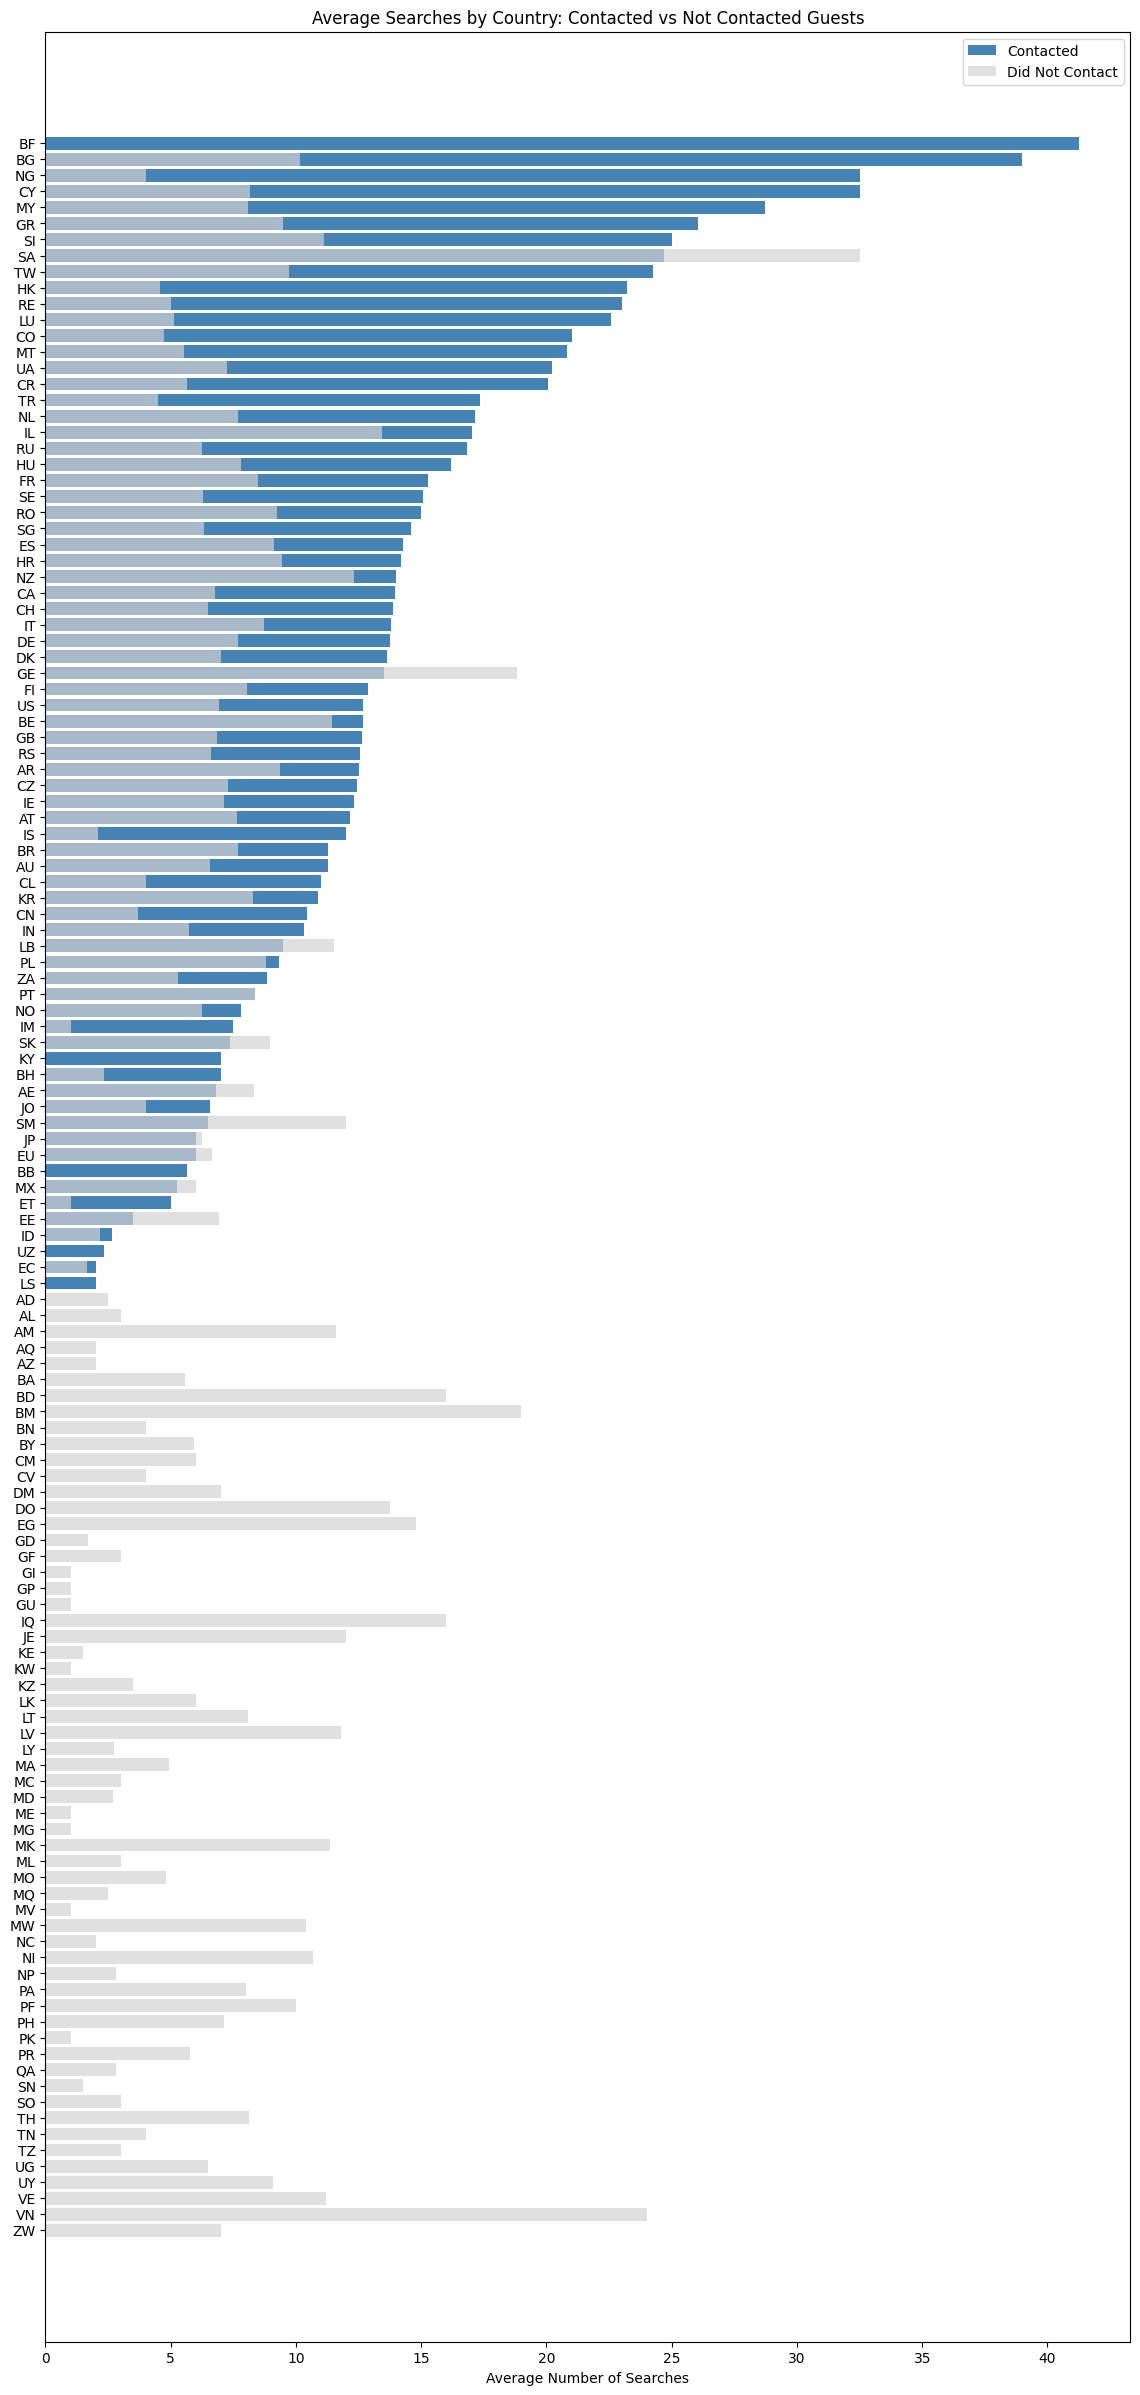

In [ ]:
# Average number of searches per origin_country
avg_searches_country = df_searches.groupby('origin_country')['n_searches'].mean().sort_values(ascending=False)

# Identify guests who made contact by id_guest and join with df_searches on id_user
# First get unique guests who contacted
guests_with_contact = df_contacts['id_guest'].unique()

# Create a column in df_searches to mark if user contacted or not
df_searches['contacted'] = df_searches['id_user'].isin(guests_with_contact)

# Average searches by country, split by contacted or not
avg_searches_country_contacted = df_searches.groupby(['origin_country', 'contacted'])['n_searches'].mean().unstack()

# Plot average number of searches by country for contacted and non-contacted guests

plt.figure(figsize=(14, 30))

# Sort countries by average searches for contacted guests
sorted_countries = avg_searches_country_contacted[True].sort_values(ascending=False).index

# Plot for guests who contacted
plt.barh(avg_searches_country_contacted.loc[sorted_countries].index, 
         avg_searches_country_contacted.loc[sorted_countries, True], 
         color='steelblue', label='Contacted')

# Plot for guests who did not contact (lighter color)
plt.barh(avg_searches_country_contacted.loc[sorted_countries].index, 
         avg_searches_country_contacted.loc[sorted_countries, False], 
         color='lightgray', label='Did Not Contact', alpha=0.7)

plt.xlabel('Average Number of Searches')
plt.title('Average Searches by Country: Contacted vs Not Contacted Guests')
plt.legend()
plt.gca().invert_yaxis()  # Highest on top
plt.show()


## 5. Analyze the distribution of maximum price filters applied by users when searching for accommodations. Exclude outliers using IQR method. 
Create a histogram to visualize the distribution of maximum prices. Are there specific price ranges that are more popular among users?


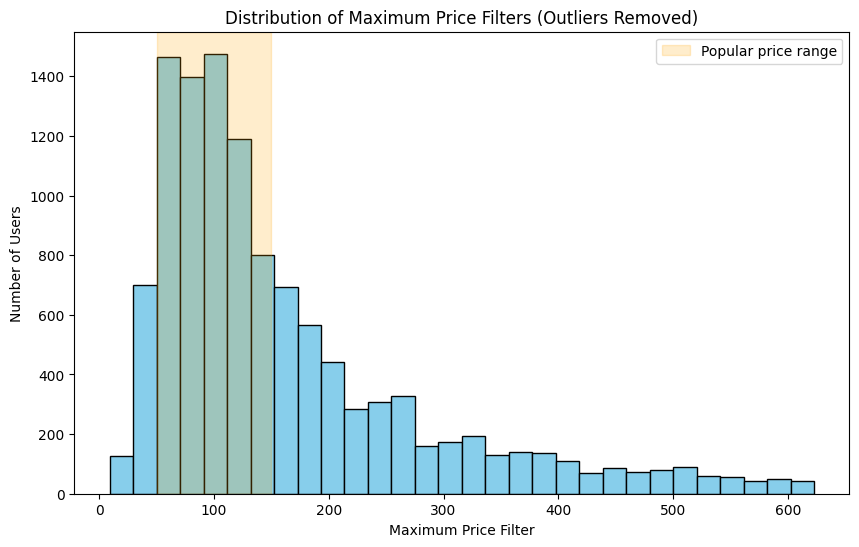

In [ ]:
# Extract max prices and drop missing values
max_prices = df_searches['filter_price_max'].dropna()

# Calculate IQR and filter out outliers
Q1 = max_prices.quantile(0.25)
Q3 = max_prices.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter max_prices to exclude outliers
filtered_prices = max_prices[(max_prices >= lower_bound) & (max_prices <= upper_bound)]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(filtered_prices, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Maximum Price Filters (Outliers Removed)')
plt.xlabel('Maximum Price Filter')
plt.ylabel('Number of Users')

# highlight common price ranges
plt.axvspan(50, 150, color='orange', alpha=0.2, label='Popular price range')

plt.legend()
plt.show()


## 6. Perform a Z-test to determine if there is a significant difference in booking success between searches for 1 guest vs. 2 guests. Calculate the booking success rate for both groups and perform the Z-test to evaluate the difference.

In [ ]:
# Merge searches and bookings by user and dates to find successful bookings
# For simplicity, let's merge on 'id_user' == 'id_guest' and overlapping date ranges
df_contacts_subset = df_contacts[['id_guest', 'ds_checkin', 'ds_checkout']]
df_searches_subset = df_searches[['id_user', 'ds_checkin', 'ds_checkout', 'n_guests_min', 'n_guests_max']]

# Add booking flag in searches by checking if a booking exists for that user and date range
def check_booking(row):
    guest_bookings = df_contacts_subset[df_contacts_subset['id_guest'] == row['id_user']]
    # Check if any booking overlaps with search dates
    overlap = guest_bookings[
        (guest_bookings['ds_checkin'] <= row['ds_checkout']) &
        (guest_bookings['ds_checkout'] >= row['ds_checkin'])
    ]
    return 1 if not overlap.empty else 0

df_searches_subset['booking_success'] = df_searches_subset.apply(check_booking, axis=1)

# Filter for 1 guest and 2 guests searches
searches_1guest = df_searches_subset[df_searches_subset['n_guests_min'] == 1]
searches_2guest = df_searches_subset[df_searches_subset['n_guests_min'] == 2]

# Calculate counts for z-test
success_1guest = searches_1guest['booking_success'].sum()
total_1guest = len(searches_1guest)

success_2guest = searches_2guest['booking_success'].sum()
total_2guest = len(searches_2guest)

# Calculate booking success rates
rate_1guest = success_1guest / total_1guest
rate_2guest = success_2guest / total_2guest

print(f"Booking success rate for 1 guest: {rate_1guest:.3f}")
print(f"Booking success rate for 2 guests: {rate_2guest:.3f}")

# Perform two-proportion Z-test
count = np.array([success_1guest, success_2guest])
nobs = np.array([total_1guest, total_2guest])

stat, pval = proportions_ztest(count, nobs)

print(f"Z-test statistic: {stat:.3f}")
print(f"P-value: {pval:.4f}")

if pval < 0.05:
    print("Significant difference in booking success rates between 1 guest and 2 guests searches.")
else:
    print("No significant difference in booking success rates between 1 guest and 2 guests searches.")


Booking success rate for 1 guest: 0.161
Booking success rate for 2 guests: 0.288
Z-test statistic: -24.708
P-value: 0.0000
Significant difference in booking success rates between 1 guest and 2 guests searches.


C:\Users\yaelh\AppData\Local\Temp\ipykernel_26876\226090074.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_searches_subset['booking_success'] = df_searches_subset.apply(check_booking, axis=1)


## 7. Do guests prefer to check in on weekends (Friday-Sunday) compared to weekdays (Monday-Thursday)?
Calculate the percentage of check-ins that occur on weekends vs. weekdays, and create a bar chart to compare the two.

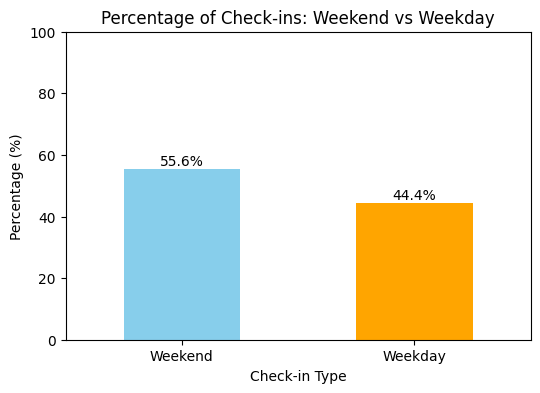

In [33]:
# Convert check-in date to weekday (0=Monday, 6=Sunday)
df_contacts['checkin_weekday'] = df_contacts['ds_checkin'].dt.dayofweek

# Define weekend vs weekday
df_contacts['checkin_type'] = df_contacts['checkin_weekday'].apply(lambda x: 'Weekend' if x >= 4 else 'Weekday')

# Calculate percentage of check-ins by type
checkin_counts = df_contacts['checkin_type'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(6,4))
checkin_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Percentage of Check-ins: Weekend vs Weekday')
plt.ylabel('Percentage (%)')
plt.xlabel('Check-in Type')
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Show exact values on bars
for i, val in enumerate(checkin_counts):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.show()


## 8. Investigate the lead time (number of days between booking and check-in). What is the average lead time for bookings? 
Create a distribution plot of lead times and analyze whether guests book far in advance or closer to their check-in dates.

Average lead time (days): 30.34


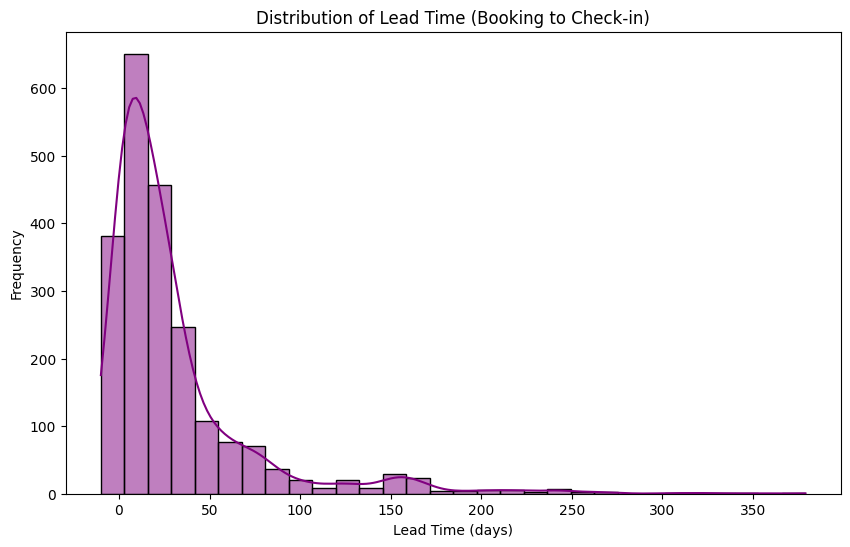

In [34]:
# Calculate lead time: days between booking date and check-in date
df_contacts['lead_time'] = (df_contacts['ds_checkin'] - df_contacts['ts_booking_at']).dt.days

# Drop missing lead times (e.g., missing booking dates)
lead_time_clean = df_contacts['lead_time'].dropna()

# Calculate average lead time
avg_lead_time = lead_time_clean.mean()
print(f'Average lead time (days): {avg_lead_time:.2f}')

# Plot distribution of lead times
plt.figure(figsize=(10, 6))
sns.histplot(lead_time_clean, bins=30, kde=True, color='purple')
plt.title('Distribution of Lead Time (Booking to Check-in)')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


## 9. Perform an ANOVA test to analyze the effect of neighborhood filters on booking success.
Compare the success rate across different neighborhoods and test if there are significant differences using ANOVA.

In [ ]:
# Prepare data with booking success flag
# Assume booking success means ts_booking_at is not null
df_contacts['booking_success'] = df_contacts['ts_booking_at'].notnull().astype(int)

# Merge df_contacts with df_searches to get neighborhood filters by user
# Use left join on id_guest == id_user to get filter_neighborhoods
df_merged = pd.merge(df_contacts, df_searches[['id_user', 'filter_neighborhoods']], 
                     left_on='id_guest', right_on='id_user', how='left')

# Filter out rows with missing neighborhood filters or booking_success
anova_df = df_merged.dropna(subset=['filter_neighborhoods', 'booking_success'])

# Group booking success rates by neighborhood filter
groups = []
for neighborhood in anova_df['filter_neighborhoods'].unique():
    group = anova_df[anova_df['filter_neighborhoods'] == neighborhood]['booking_success']
    groups.append(group)

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in booking success across neighborhoods.")
else:
    print("No statistically significant difference in booking success across neighborhoods.")


ANOVA F-statistic: 1.386, p-value: 0.003
There is a statistically significant difference in booking success across neighborhoods.


## 10. Analyze guests who contacted multiple hosts during their search. What percentage of guests contacted more than one host? 
How does this behavior differ between guests looking for short-term vs. long-term stays?

Overall, 45.45% of guests contact more than one host.

Percentage contacting multiple hosts by stay type:
stay_type
long-term     52.367688
short-term    44.596443
Name: multiple_hosts, dtype: float64


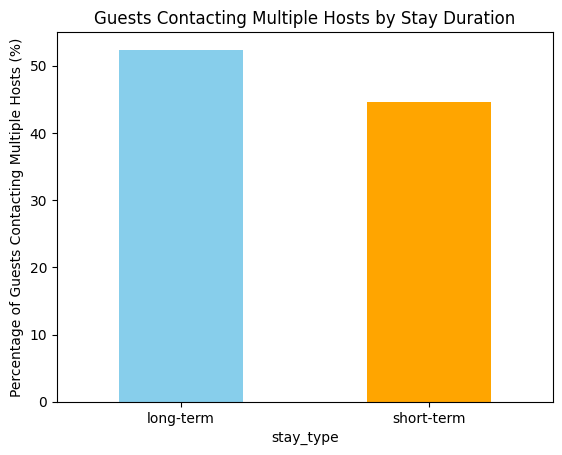

In [ ]:
# Count number of unique hosts contacted per guest
hosts_per_guest = df_contacts.groupby('id_guest')['id_host'].nunique().reset_index()
hosts_per_guest.rename(columns={'id_host': 'unique_hosts_contacted'}, inplace=True)

# Mark guests who contacted more than one host
hosts_per_guest['multiple_hosts'] = hosts_per_guest['unique_hosts_contacted'] > 1

# Merge with searches data to get stay duration info (using n_nights)
guest_stays = df_searches.groupby('id_user')['n_nights'].mean().reset_index()

# Rename id_user to id_guest to match
guest_stays.rename(columns={'id_user': 'id_guest'}, inplace=True)

# Merge hosts_per_guest with guest_stays
guest_behavior = pd.merge(hosts_per_guest, guest_stays, on='id_guest', how='left')

# Categorize guests into short-term (<=7 nights) and long-term (>7 nights)
guest_behavior['stay_type'] = guest_behavior['n_nights'].apply(lambda x: 'short-term' if x <= 7 else 'long-term')

# Calculate percentage of guests contacting multiple hosts overall
overall_pct_multiple = guest_behavior['multiple_hosts'].mean() * 100

# Calculate percentage by stay_type
pct_by_stay_type = guest_behavior.groupby('stay_type')['multiple_hosts'].mean() * 100

print(f"Overall, {overall_pct_multiple:.2f}% of guests contact more than one host.")

print("\nPercentage contacting multiple hosts by stay type:")
print(pct_by_stay_type)

# Optional: visualize with barplot
import matplotlib.pyplot as plt

pct_by_stay_type.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Percentage of Guests Contacting Multiple Hosts (%)')
plt.title('Guests Contacting Multiple Hosts by Stay Duration')
plt.xticks(rotation=0)
plt.show()


## 11. Do larger groups prefer different room types? Analyze the preferences of different group sizes (e.g., solo travelers, couples, families) in terms of the room types they search for (e.g., entire home, shared room). Exclude categories that are less than 1% in overall amount (group size aswell)
Create a stacked bar plot to visualize the results.

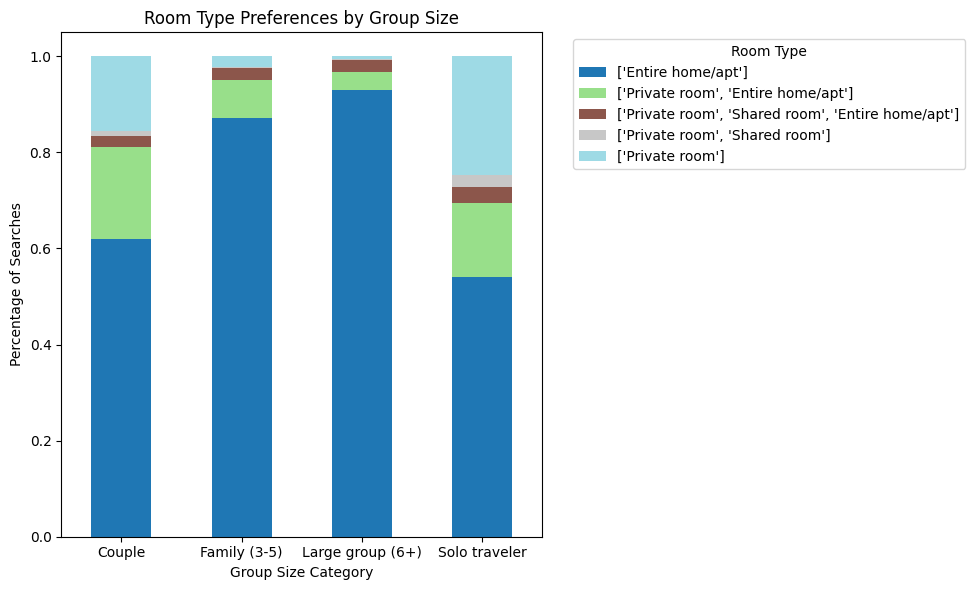

In [ ]:

# Define group size categories based on n_guests_min from df_searches
def categorize_group_size(n):
    if n == 1:
        return 'Solo traveler'
    elif n == 2:
        return 'Couple'
    elif 3 <= n <= 5:
        return 'Family (3-5)'
    else:
        return 'Large group (6+)'

df_searches['group_size_cat'] = df_searches['n_guests_min'].apply(categorize_group_size)

# Filter out categories (group sizes and room types) that are less than 1% overall
# Calculate % for group sizes
group_size_counts = df_searches['group_size_cat'].value_counts(normalize=True)
group_sizes_to_keep = group_size_counts[group_size_counts >= 0.01].index.tolist()

# Calculate % for room types
room_type_counts = df_searches['filter_room_types'].value_counts(normalize=True)
room_types_to_keep = room_type_counts[room_type_counts >= 0.01].index.tolist()

# Filter dataframe to keep only these categories
filtered_df = df_searches[
    (df_searches['group_size_cat'].isin(group_sizes_to_keep)) &
    (df_searches['filter_room_types'].isin(room_types_to_keep))
]

# Create a crosstab of group_size_cat vs filter_room_types with counts
group_room_crosstab = pd.crosstab(filtered_df['group_size_cat'], filtered_df['filter_room_types'])

# Convert counts to percentages (row-wise)
group_room_pct = group_room_crosstab.div(group_room_crosstab.sum(axis=1), axis=0)

# Plot stacked bar chart of preferences by group size
group_room_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

plt.title('Room Type Preferences by Group Size')
plt.xlabel('Group Size Category')
plt.ylabel('Percentage of Searches')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 12. Investigate the factors that contribute to cancellations, such as long response times or high price ranges.

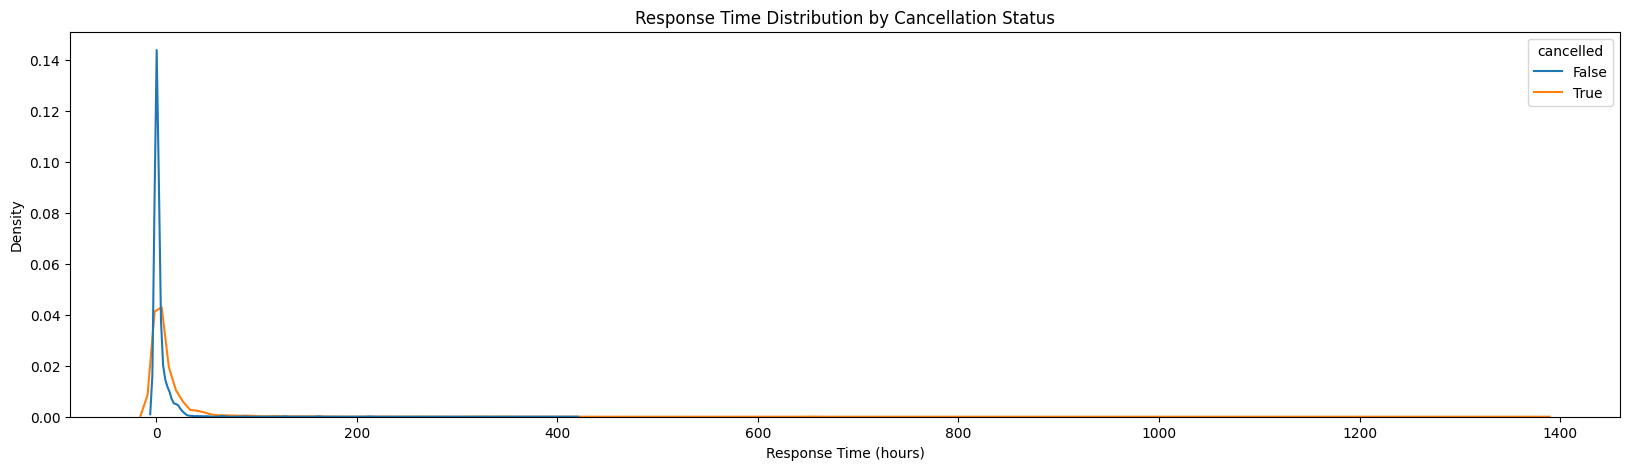

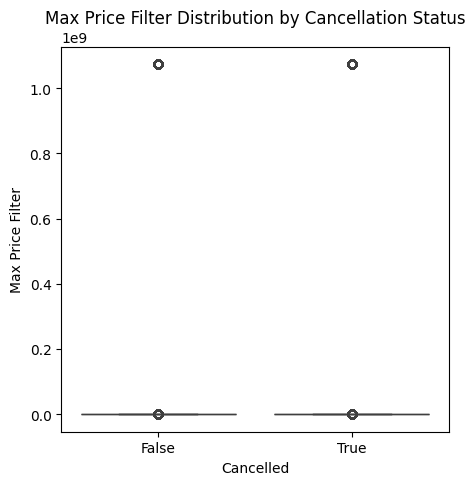

In [50]:
# Create a cancellation flag in df_contacts (True if no booking confirmed)
df_contacts['cancelled'] = df_contacts['ts_booking_at'].isna()

# Calculate response time in hours (host reply time)
df_contacts['response_time_hours'] = (df_contacts['ts_reply_at'] - df_contacts['ts_contact_at']).dt.total_seconds() / 3600

# Merge with df_searches to get price filters (join on id_guest and id_user)
df_merged = pd.merge(
    df_contacts,
    df_searches,
    left_on='id_guest',
    right_on='id_user',
    how='left'
)

# Plot distribution of response times for cancelled vs. booked
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df_merged, x='response_time_hours', hue='cancelled', common_norm=False)
plt.title('Response Time Distribution by Cancellation Status')
plt.xlabel('Response Time (hours)')
plt.ylabel('Density')
plt.show()

# Plot distribution of max price filters for cancelled vs. booked
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_merged, x='cancelled', y='filter_price_max')
plt.title('Max Price Filter Distribution by Cancellation Status')
plt.xlabel('Cancelled')
plt.ylabel('Max Price Filter')
plt.show()

C:\Users\yaelh\AppData\Local\Temp\ipykernel_26876\3136978662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_merged, x='cancelled', y='response_time_hours', palette=['green', 'red'])


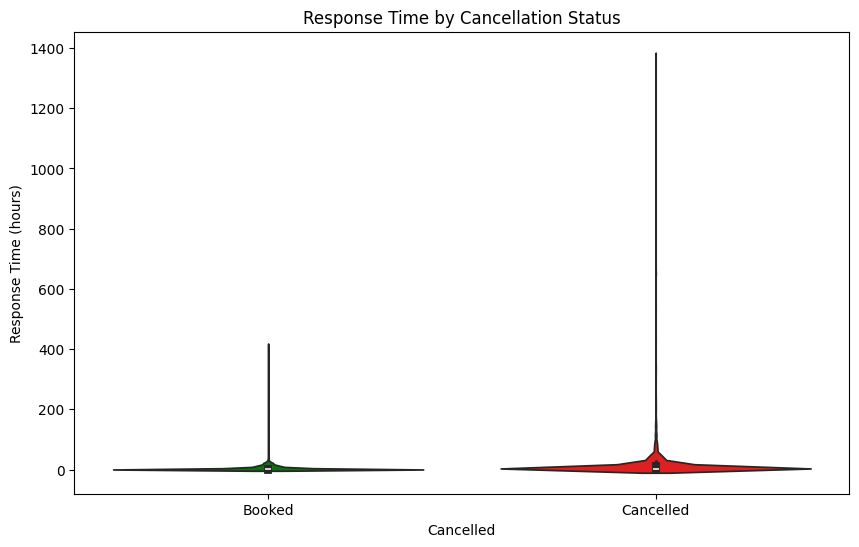

In [39]:
#response time
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_merged, x='cancelled', y='response_time_hours', palette=['green', 'red'])
plt.title('Response Time by Cancellation Status')
plt.xlabel('Cancelled')
plt.ylabel('Response Time (hours)')
plt.xticks([0, 1], ['Booked', 'Cancelled'])
plt.show()


In [40]:
# Group by cancellation status and describe filter_price_max
price_stats = df_merged.groupby('cancelled')['filter_price_max'].describe()

# Rename index for clarity
price_stats.index = ['Booked', 'Cancelled']

# Show the table
price_stats


,count,mean,std,min,25%,50%,75%,max
Booked,3257.0,7.681377e+07,2.767691e+08,9.0,81.0,134.0,271.0,1.073742e+09
Cancelled,10856.0,7.427986e+07,2.724822e+08,21.0,76.0,134.0,267.0,1.073742e+09


## 13. Analyze how the timing of the last search affects booking success.
Calculate the time difference between the last search and the booking date.
Group the data by time difference and compare the booking success rates.

In [ ]:
# get the last search per user
df_searches['ds'] = pd.to_datetime(df_searches['ds'])
df_last_search = df_searches.sort_values('ds').groupby('id_user').tail(1).copy()

# merge with contacts to check if there was a booking
df_contacts['ts_booking_at'] = pd.to_datetime(df_contacts['ts_booking_at'])

# Merge: keep all last searches and see if they made a booking
df_combined = pd.merge(df_last_search, df_contacts[['id_guest', 'ts_booking_at']],
                       left_on='id_user', right_on='id_guest', how='left')

# calculate days between search and booking (only if booking exists)
df_combined['days_before_booking'] = (df_combined['ts_booking_at'] - df_combined['ds']).dt.days

# binning the time differences
bins = [0, 1, 3, 7, 14, 30, 60, 90, float('inf')]
labels = ['0-1d', '2-3d', '4-7d', '8-14d', '15-30d', '31-60d', '61-90d', '90+d']
df_combined['time_bin'] = pd.cut(df_combined['days_before_booking'], bins=bins, labels=labels, right=False)

# calculate booking rate (booking means ts_booking_at is not null)
result = df_combined.groupby('time_bin').agg(
    total_searches=('id_user', 'count'),
    bookings=('ts_booking_at', lambda x: x.notna().sum())
).reset_index()

result['booking_success_rate'] = result['bookings'] / result['total_searches']

print(result)


  time_bin  total_searches  bookings  booking_success_rate
0     0-1d             985       985                   1.0
1     2-3d             407       407                   1.0
2     4-7d             134       134                   1.0
3    8-14d             143       143                   1.0
4   15-30d             142       142                   1.0
5   31-60d              68        68                   1.0
6   61-90d              28        28                   1.0
7     90+d              15        15                   1.0


C:\Users\yaelh\AppData\Local\Temp\ipykernel_26876\4094859508.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df_combined.groupby('time_bin').agg(


## 14. Do larger groups tend to apply more search filters (e.g., price, neighborhood, room type) compared to smaller groups? 

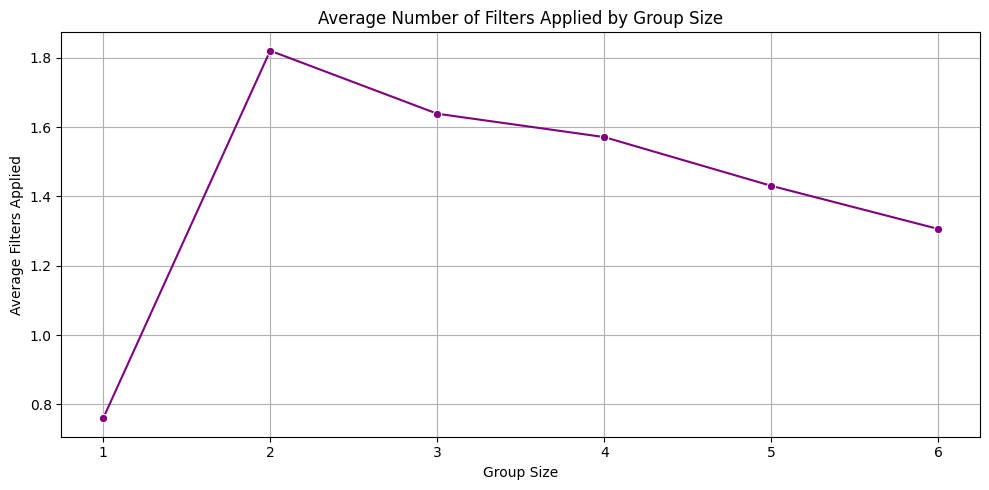

In [ ]:
# Estimate group size as the average of min and max guests
df_searches['group_size'] = ((df_searches['n_guests_min'] + df_searches['n_guests_max']) / 2).round()

# Count how many filters were applied for each search
df_searches['filter_count'] = (
    df_searches[['filter_price_min', 'filter_price_max', 'filter_room_types', 'filter_neighborhoods']]
    .notna()
    .sum(axis=1)
)

# Aggregate by group size
group_filter_stats = df_searches.groupby('group_size').agg(
    avg_filters_applied=('filter_count', 'mean'),
    count=('filter_count', 'size')
).reset_index()

# Exclude very rare group sizes (less than 1% of total searches)
total = group_filter_stats['count'].sum()
group_filter_stats = group_filter_stats[group_filter_stats['count'] > 0.01 * total]

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=group_filter_stats, x='group_size', y='avg_filters_applied', marker='o', color='purple')
plt.title('Average Number of Filters Applied by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Filters Applied')
plt.grid(True)
plt.tight_layout()
plt.show()


## 15. Analyze the relationship between booking success and the time of the year (seasonality).
Create a line plot to visualize booking success.

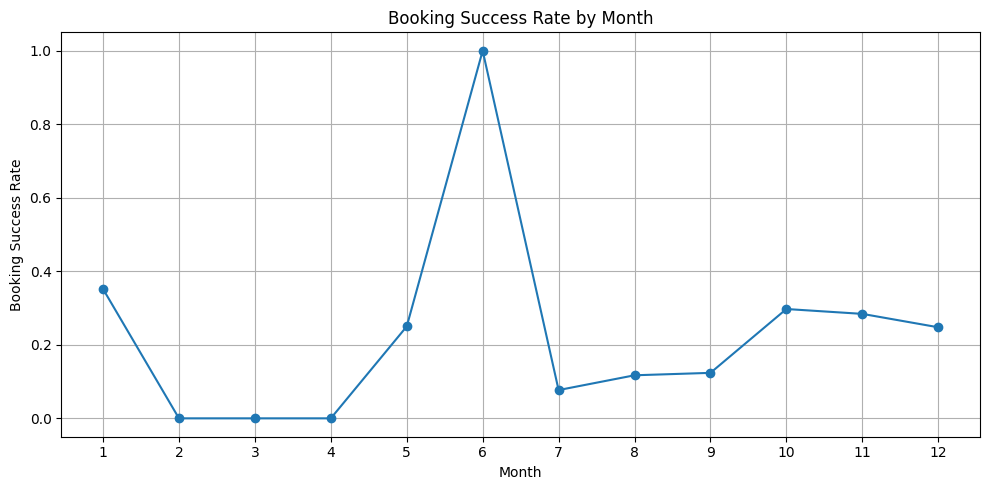

In [44]:
# Make sure timestamps are datetime objects
df_contacts['ts_contact_at'] = pd.to_datetime(df_contacts['ts_contact_at'])
df_contacts['ts_booking_at'] = pd.to_datetime(df_contacts['ts_booking_at'])

# Extract month of contact as numeric value (1 to 12)
df_contacts['contact_month'] = df_contacts['ts_contact_at'].dt.month

# Create a new column that flags whether a booking occurred (1 if yes, 0 if no)
df_contacts['booking_success'] = df_contacts['ts_booking_at'].notna().astype(int)

# Group by month and calculate the average booking success rate per month
monthly_booking_rate = df_contacts.groupby('contact_month')['booking_success'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_booking_rate['contact_month'], monthly_booking_rate['booking_success'], marker='o')
plt.title('Booking Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Booking Success Rate')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusions

## Conclusions, insights and actions

1. Optimize Supply of Popular Room Types
Insight: Guests mostly stay in private rooms and shared rooms, with an average stay of around 20 days.

Action: Encourage hosts to list more private rooms and optimize search visibility for these types. Emphasize listings suitable for medium to long-term stays.

2. Reevaluate Underperforming Accommodation Types
Insight: Shared rooms and entire apartments have lower booking success rates.

Action: Review pricing, quality, and competitiveness of these listings. Consider deprioritizing or enhancing them with better photos or descriptions.

3. Leverage Guest Behavior Based on Contact Timing
Insight: Most guest-to-host contacts happen between 6 PM and 9 PM.

Action: Schedule push notifications, email reminders, or dynamic ad placements before peak hours. Encourage hosts to stay responsive during this window.

4. Target by Stay Duration
Insight: Guests staying longer tend to make more contacts per search.

Action: Highlight long-term booking benefits and enable specific marketing or discounts for longer stays.

5. Country-Specific Search Patterns
Insight: Guests from Burkina Faso, Bulgaria, and Nigeria tend to perform more searches before contacting hosts.

Action: Improve user experience for high-search users (e.g., smarter suggestions, easier filtering), and consider targeted ads or localized UX adjustments for these countries.

6. Price Sensitivity and Optimization
Insight: The most popular price range across all guests is between €50 and €150.

Action: Guide hosts to set prices within this range to increase visibility. Consider smart pricing tools or dynamic pricing suggestions.

7. Higher Booking Success with Small Groups
Insight: Searches for 2 guests result in significantly higher booking success than those for solo travelers.

Action: Prioritize listings and UX for couples or small groups in recommendations and promotions.

8. Seasonal Booking Trends
Insight: Booking success peaks in June and is lowest in February, March, and April.

Action: Intensify marketing and discount campaigns during off-peak months. Adjust host incentives and promotions based on seasonal trends.

9. Short-Term Booking Behavior
Insight: Most bookings happen within 0–40 days before check-in.

Action: Emphasize flexible listings and last-minute deals. Hosts should ensure availability and pricing are optimized for this short lead time.

10. Response Time Not a Major Cancellation Factor
Insight: Median response times are similar for successful and canceled bookings. Outliers skew the mean.

Action: Avoid relying solely on response time as a quality metric. Instead, focus on acceptance rates or guest satisfaction scores.

11. Filter Usage Varies by Group Size
Insight: Groups of 2 guests apply the most filters; usage declines slightly for larger groups and is lowest for solo travelers.

Action: Personalize search experiences by group size — show more filters for groups of 2+, and keep it simple for solo users.